## Overpriced items prediction

Using some machine learning algorithms to predict if an item is overpriced or not.

OBSERVAÇÃO: Este notebook, apesar de funcional, ainda está em uma versão inicial. Ainda precisa ser refatorado e melhorado.

In [1]:
import pandas as pd
import numpy as np

Data = pd.read_csv('Salic_Data.csv')
Data.columns = ['IdPRONAC', 'CgcCpf', 'AnoProjeto', 'Sequencial', 'idPlanilhaEtapa', 'UF', 'Municipio', 'Item', 'Unidade', 'Quantidade(Proposta)', 'Ocorrencia(Proposta)', 'QtdeDias(Proposta)', 'ValorUnitario(Proposta)', 'Justificativa(Proposta)', 'Quantidade(Projeto)', 'Ocorrencia(Projeto)', 'QtdeDias(Projeto)', 'ValorUnitario(Projeto)', 'Justificativa(Parecista)', 'Produto']

X = Data[['IdPRONAC', 'CgcCpf', 'AnoProjeto', 'Sequencial', 'idPlanilhaEtapa', 'UF', 'Municipio', 'Item', 'Unidade', 'Quantidade(Proposta)', 'Ocorrencia(Proposta)', 'QtdeDias(Proposta)', 'ValorUnitario(Proposta)', 'Justificativa(Proposta)', 'Quantidade(Projeto)', 'Ocorrencia(Projeto)', 'QtdeDias(Projeto)', 'ValorUnitario(Projeto)', 'Justificativa(Parecista)', 'Produto']]
X

,IdPRONAC,CgcCpf,AnoProjeto,Sequencial,idPlanilhaEtapa,UF,Municipio,Item,Unidade,Quantidade(Proposta),Ocorrencia(Proposta),QtdeDias(Proposta),ValorUnitario(Proposta),Justificativa(Proposta),Quantidade(Projeto),Ocorrencia(Projeto),QtdeDias(Projeto),ValorUnitario(Projeto),Justificativa(Parecista),Produto
0,111109,44973608220,9,1,3,PA,Belém,Cartaz,Serviço,10000.0,1,60,0.52,NaN,10000.0,1,60,0.52,NaN,Apresentação Musical
1,111638,61953369200,9,525,4,PA,Belém,Locação de computadores,Unidade,10.0,1,120,1500.00,NaN,10.0,1,120,1000.00,Readequamos de acordo com os valores médios pr...,Administração do Projeto
2,111348,4776109000176,9,235,2,CE,Fortaleza,Projeto de Iluminação,Serviço,1.0,1,5,20000.00,NaN,1.0,1,5,20000.00,NaN,Festival/Mostra
3,111729,4221843000179,9,616,4,DF,Brasília,Coordenador Administrativo,Mês,2.0,1,60,2000.00,NaN,2.0,1,60,2000.00,NaN,Administração do Projeto
4,111643,2849086000157,9,530,2,DF,Brasília,Maquiador,Mês,6.0,1,180,600.00,NaN,6.0,1,180,600.00,NaN,Espetáculo de Artes Cênicas
5,111350,4958684000190,9,237,3,DF,Brasília,Cartaz,Unidade,500.0,1,90,1.80,NaN,500.0,1,90,1.80,NaN,Festival/Mostra
6,111350,4958684000190,9,237,3,RJ,Rio de Janeiro,Cartaz,Unidade,1.0,500,90,1.80,NaN,500.0,1,90,1.80,NaN,Festival/Mostra
7,111350,4958684000190,9,237,3,DF,Brasília,Cartaz,Unidade,500.0,1,90,1.80,NaN,1.0,500,90,1.80,NaN,Festival/Mostra
8,111350,4958684000190,9,237,3,RJ,Rio de Janeiro,Cartaz,Unidade,1.0,500,90,1.80,NaN,1.0,500,90,1.80,NaN,Festival/Mostra
9,111112,5128488000150,9,4,2,RJ,Rio de Janeiro,Hospedagem sem Alimentação,Dia,48.0,2,5,150.00,NaN,48.0,2,5,150.00,NaN,Festival/Mostra


## Data Processing

Foram criadas as seguintes colunas para seram usadas como "label":

    - Aprovado?
    Significa que não houve alteração no preço do item ao passar de proposta para projeto.
    
    - Reprovado?(PrecoAumentou)
    Significa que o preço do item está abaixo da média, e aumentou ao virar projeto.
    
    - Reprovado?(PrecoDiminuiu)
    Significa que o preço do item está acima da média, e diminuiu ao virar projeto.
    
    - Removido?
    O item foi removido da proposta.

In [2]:
X['Aprovado?'] = X['ValorUnitario(Proposta)'] == X['ValorUnitario(Projeto)']
X['Reprovado?(PrecoAumentou)'] = np.array(X['ValorUnitario(Proposta)']) < np.array(X['ValorUnitario(Projeto)'])
X['Reprovado?(PrecoDiminuiu)'] = np.array(X['ValorUnitario(Proposta)']) > np.array(X['ValorUnitario(Projeto)'])
X['Removido?'] = (np.array(X['ValorUnitario(Projeto)']) == 0) * (np.array(X['ValorUnitario(Proposta)']) != 0)


ConjuntoDeItens = set(X['Item'])

# FEATURE INDICES
itemIndex = {featureName: index for index, featureName in enumerate(X)}


from collections import defaultdict
itensDict = defaultdict(list)

X_values = X.values
for item  in X_values:
    itensDict[item[itemIndex['Item']]].append(item) 

## Plot Data

Plotar gráficos do preço dos itens pelo ano (os itens são espalhados de forma randômica pelo ano para melhor visualização).

    - Aprovado: Azul
    - Preço diminuiu: Vermelho
    - Preço aumentou: Verde
    - Removido: Laranja


Coordenação de animação


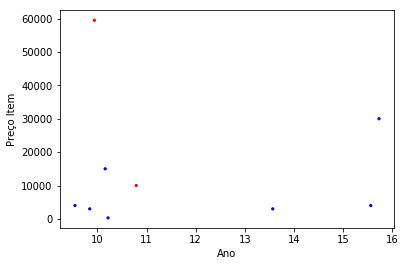

Gelo seco 


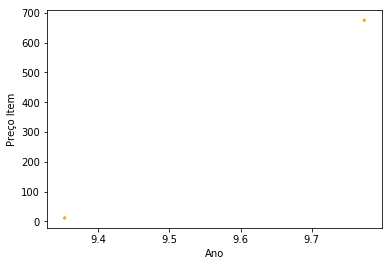

Instrutor


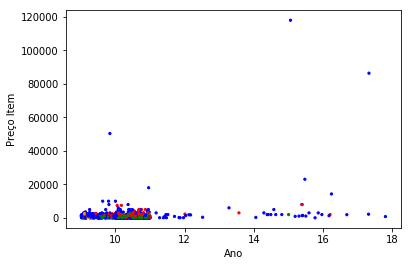

Manutenção predial



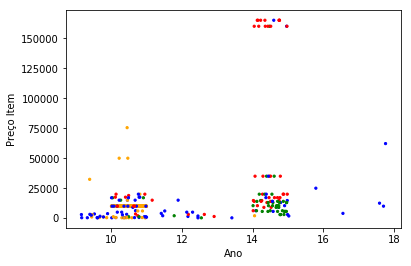

Pré-moldados de concreto


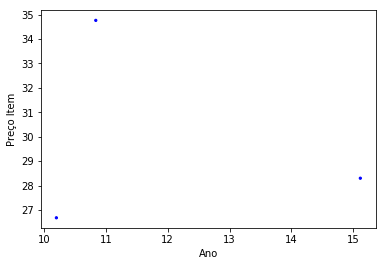

Coordenação de Comunicação


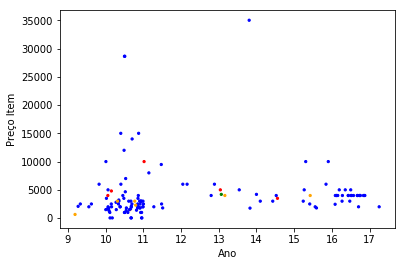

Decorador de Set


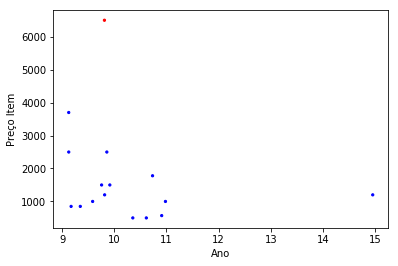

Bancos


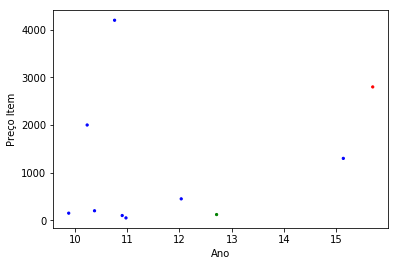

Material para Primeiros Socorros


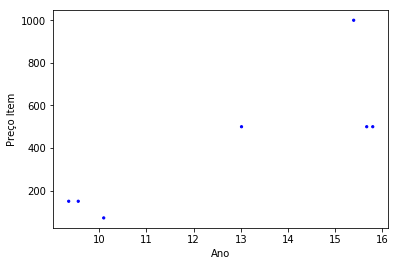

Mestre de Cerimônia


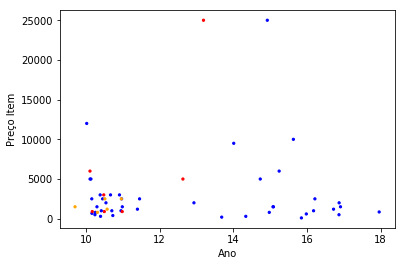

Rodapé de jornal


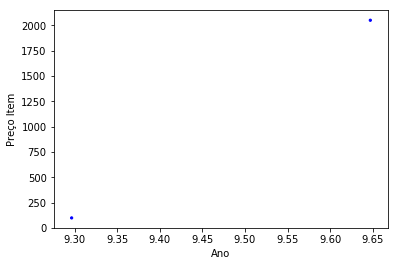

In [12]:
def point_color(aprovado, diminuiu, aumentou, removido):
    if(aprovado):
        return 'Blue'
    if(diminuiu and not removido):
        return 'Red'
    if(aumentou and not removido):
        return 'Green'
    if(removido):
        return 'Orange'


import matplotlib.pyplot as plt

for index, itemName in enumerate(ConjuntoDeItens):
    print(itemName)
    item = itensDict[itemName]
    itemArray = np.array(item)

    color_array = [point_color(aprovado, diminuiu, aumentou, removido) for aprovado, diminuiu, aumentou, removido in itemArray[:,[itemIndex['Aprovado?'], itemIndex['Reprovado?(PrecoDiminuiu)'], itemIndex['Reprovado?(PrecoAumentou)'], itemIndex['Removido?']]]]
    #plt.scatter(x=itemArray[:,itemIndex['AnoProjeto']],y=itemArray[:,itemIndex['ValorUnitario(Proposta)']], c=color_array)

    x_position_array = itemArray[:,itemIndex['AnoProjeto']]
    #print(x_position_array)
    x_position_array = x_position_array + np.random.rand(1,len(x_position_array))
    #print(x_position_array)
    plt.scatter(x=x_position_array,y=itemArray[:,itemIndex['ValorUnitario(Proposta)']], c=color_array, s=5)
    
    plt.xlabel('Ano')
    plt.ylabel('Preço Item')
    
    
    plt.show()

    # Limitar o número de gráficos
    if (index ==10):
        break

## Print features of a specific item

Imprime as "features" de um item específico.

In [13]:
item_name = 'Porta acústica'
item_to_evaluate = itensDict[item_name]


for item in item_to_evaluate:
    print(item[itemIndex['Item']], '\n')
    for k, v in itemIndex.items(): 
        print(k, ': ', item[v])
    print('------------------\n')


Porta acústica 

IdPRONAC :  119441
CgcCpf :  3982591000138
AnoProjeto :  9
Sequencial :  8147
idPlanilhaEtapa :  2
UF :  SP
Municipio :  São Paulo
Item :  Porta acústica
Unidade :  Verba
Quantidade(Proposta) :  3.0
Ocorrencia(Proposta) :  1
QtdeDias(Proposta) :  730
ValorUnitario(Proposta) :  6772.99
Justificativa(Proposta) :  nan
Quantidade(Projeto) :  3.0
Ocorrencia(Projeto) :  1
QtdeDias(Projeto) :  730
ValorUnitario(Projeto) :  0.0
Justificativa(Parecista) :  A pedido do proponente. Item será objeto de segunda etapa do projeto, após implementação da 1ª etapa.
Produto :  Bem Imóvel - Reforma / Ampliação / Construção / Aquisição
Aprovado? :  False
Reprovado?(PrecoAumentou) :  False
Reprovado?(PrecoDiminuiu) :  True
Removido? :  True
------------------

Porta acústica 

IdPRONAC :  207226
CgcCpf :  12011520000189
AnoProjeto :  16
Sequencial :  4398
idPlanilhaEtapa :  2
UF :  SP
Municipio :  Rincão
Item :  Porta acústica
Unidade :  Unidade
Quantidade(Proposta) :  1.0
Ocorrencia(Propos

## Applying some ML algorithms


### Random Forest Classifier

In [15]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import itertools

for index, itemName in enumerate(ConjuntoDeItens):
    item = itensDict[itemName]
    itemArray = np.array(item)

    # ONLY EVALUATE ITEMS THAT ARE USED MORE THEN 20 TIMES.
    if (len(itemArray) > 20):
        X = itemArray[:,[itemIndex['AnoProjeto'], itemIndex['idPlanilhaEtapa'], itemIndex['Quantidade(Proposta)'], itemIndex['Ocorrencia(Proposta)'] , itemIndex['QtdeDias(Proposta)'], itemIndex['ValorUnitario(Proposta)']]]
        Y = itemArray[:,[itemIndex['Reprovado?(PrecoDiminuiu)']]].transpose()[0].astype(int)  


        kf = KFold(n_splits=4)
        kf.get_n_splits(X)

        total_confusion_matrix = [[0, 0], [0, 0]]
        for train_index, test_index in kf.split(X):
            #print("\n\n","TRAIN_X:", X[train_index], "\n", "TEST_X:", X[test_index], "\n")
            #print("TRAIN_Y:", Y[train_index], "\n", "TEST_Y:", Y[test_index], "\n\n")
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = Y[train_index], Y[test_index]

            
            classifier = RandomForestClassifier(n_estimators=10, class_weight='balanced')   # class_weight={0:1, 1:1}
            y_pred = classifier.fit(X_train, y_train).predict(X_test)

            
            # Compute confusion matrix
            cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
            total_confusion_matrix = total_confusion_matrix + cnf_matrix
            
            #print(cnf_matrix, flush=True)
        print(total_confusion_matrix, flush=True)
        print('Accuracy: ', (total_confusion_matrix[0][0] + total_confusion_matrix[1][1]) / sum(sum(total_confusion_matrix)))
    
    # ONLY RUN IN SOME ITEMS.
    if(index >= 50):
        break

[[763  37]
 [188  11]]
Accuracy:  0.7747747747747747
[[ 92  22]
 [ 60 341]]
Accuracy:  0.8407766990291262
[[121   3]
 [ 12   0]]
Accuracy:  0.8897058823529411
[[38  4]
 [10  2]]
Accuracy:  0.7407407407407407
[[189   3]
 [ 20   0]]
Accuracy:  0.8915094339622641
[[17  3]
 [ 4  0]]
Accuracy:  0.7083333333333334
[[65 27]
 [29 30]]
Accuracy:  0.6291390728476821
[[24  4]
 [ 2  4]]
Accuracy:  0.8235294117647058
[[139  10]
 [ 12   8]]
Accuracy:  0.8698224852071006
[[1113   90]
 [ 174   29]]
Accuracy:  0.8122332859174964
[[27  1]
 [ 3 16]]
Accuracy:  0.9148936170212766
[[187  20]
 [ 80  60]]
Accuracy:  0.7118155619596542
[[36  1]
 [ 7  1]]
Accuracy:  0.8222222222222222
[[387  11]
 [ 60   3]]
Accuracy:  0.8459869848156182


### AdaBoostClassifier

In [16]:
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier


from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import itertools

for index, itemName in enumerate(ConjuntoDeItens):
    item = itensDict[itemName]
    itemArray = np.array(item)

    # ONLY EVALUATE ITEMS THAT ARE USED MORE THEN 20 TIMES.
    if (len(itemArray) > 20):
        X = itemArray[:,[itemIndex['AnoProjeto'], itemIndex['idPlanilhaEtapa'], itemIndex['Quantidade(Proposta)'], itemIndex['Ocorrencia(Proposta)'] , itemIndex['QtdeDias(Proposta)'], itemIndex['ValorUnitario(Proposta)']]]
        Y = itemArray[:,[itemIndex['Reprovado?(PrecoDiminuiu)']]].transpose()[0].astype(int)  


        kf = KFold(n_splits=4)
        kf.get_n_splits(X)

        total_confusion_matrix = [[0, 0], [0, 0]]
        for train_index, test_index in kf.split(X):
            #print("\n\n","TRAIN_X:", X[train_index], "\n", "TEST_X:", X[test_index], "\n")
            #print("TRAIN_Y:", Y[train_index], "\n", "TEST_Y:", Y[test_index], "\n\n")
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = Y[train_index], Y[test_index]

            
            classifier = AdaBoostClassifier(n_estimators=100)
            y_pred = classifier.fit(X_train, y_train).predict(X_test)

            
            # Compute confusion matrix
            cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
            total_confusion_matrix = total_confusion_matrix + cnf_matrix
            
            #print(cnf_matrix, flush=True)
        print(total_confusion_matrix, flush=True)
        print('Accuracy: ', (total_confusion_matrix[0][0] + total_confusion_matrix[1][1]) / sum(sum(total_confusion_matrix)))
    
    # ONLY RUN IN SOME ITEMS.
    if(index >= 50):
        break

[[751  49]
 [167  32]]
Accuracy:  0.7837837837837838
[[ 53  61]
 [ 27 374]]
Accuracy:  0.829126213592233
[[115   9]
 [ 11   1]]
Accuracy:  0.8529411764705882
[[39  3]
 [ 9  3]]
Accuracy:  0.7777777777777778
[[190   2]
 [ 18   2]]
Accuracy:  0.9056603773584906
[[17  3]
 [ 4  0]]
Accuracy:  0.7083333333333334
[[61 31]
 [27 32]]
Accuracy:  0.6158940397350994
[[25  3]
 [ 3  3]]
Accuracy:  0.8235294117647058
[[134  15]
 [ 14   6]]
Accuracy:  0.8284023668639053
[[1148   55]
 [ 181   22]]
Accuracy:  0.8321479374110953
[[26  2]
 [ 3 16]]
Accuracy:  0.8936170212765957
[[182  25]
 [ 82  58]]
Accuracy:  0.69164265129683
[[30  7]
 [ 7  1]]
Accuracy:  0.6888888888888889
[[384  14]
 [ 63   0]]
Accuracy:  0.8329718004338394


### Logistic Regression

In [18]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import itertools

for index, itemName in enumerate(ConjuntoDeItens):
    item = itensDict[itemName]
    itemArray = np.array(item)

    # ONLY EVALUATE ITEMS THAT ARE USED MORE THEN 20 TIMES.
    if (len(itemArray) > 20):
        X = itemArray[:,[itemIndex['AnoProjeto'], itemIndex['idPlanilhaEtapa'], itemIndex['Quantidade(Proposta)'], itemIndex['Ocorrencia(Proposta)'] , itemIndex['QtdeDias(Proposta)'], itemIndex['ValorUnitario(Proposta)']]]
        Y = itemArray[:,[itemIndex['Reprovado?(PrecoDiminuiu)']]].transpose()[0].astype(int)  


        kf = KFold(n_splits=4)
        kf.get_n_splits(X)

        total_confusion_matrix = [[0, 0], [0, 0]]
        for train_index, test_index in kf.split(X):
            #print("\n\n","TRAIN_X:", X[train_index], "\n", "TEST_X:", X[test_index], "\n")
            #print("TRAIN_Y:", Y[train_index], "\n", "TEST_Y:", Y[test_index], "\n\n")
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = Y[train_index], Y[test_index]

            
            classifier = LogisticRegression(class_weight = 'balanced')
            y_pred = classifier.fit(X_train, y_train).predict(X_test)

            
            # Compute confusion matrix
            cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
            total_confusion_matrix = total_confusion_matrix + cnf_matrix
            
            #print(cnf_matrix, flush=True)
        print(total_confusion_matrix, flush=True)
        print('Accuracy: ', (total_confusion_matrix[0][0] + total_confusion_matrix[1][1]) / sum(sum(total_confusion_matrix)))
    
    # ONLY RUN IN SOME ITEMS.
    if(index >= 50):
        break

[[542 258]
 [ 84 115]]
Accuracy:  0.6576576576576577
[[ 78  36]
 [ 39 362]]
Accuracy:  0.8543689320388349
[[71 53]
 [ 5  7]]
Accuracy:  0.5735294117647058
[[28 14]
 [ 4  8]]
Accuracy:  0.6666666666666666
[[103  89]
 [ 11   9]]
Accuracy:  0.5283018867924528
[[ 9 11]
 [ 4  0]]
Accuracy:  0.375
[[38 54]
 [24 35]]
Accuracy:  0.48344370860927155
[[16 12]
 [ 3  3]]
Accuracy:  0.5588235294117647
[[100  49]
 [ 10  10]]
Accuracy:  0.650887573964497
[[1045  158]
 [ 133   70]]
Accuracy:  0.7930298719772404
[[23  5]
 [ 2 17]]
Accuracy:  0.851063829787234
[[175  32]
 [ 70  70]]
Accuracy:  0.7060518731988472
[[27 10]
 [ 5  3]]
Accuracy:  0.6666666666666666
[[314  84]
 [ 32  31]]
Accuracy:  0.7483731019522777


### SVM

TO DO: 
    - Improve features
    - Try other algorithms
    - Change class_weight
    - ...